## Import Libraries

In [1]:
import matplotlib.pyplot as plt
from numpy import sin, cos, sqrt, pi, linspace, arange, deg2rad, rad2deg, array
from numpy import arcsin, arccos,sort, argsort, argwhere, argmin, argmax, interp, concatenate, zeros
from scipy.spatial import distance
import warnings
from numpy import linalg as LA
warnings.simplefilter('ignore')

def sec(x):
    return 1/cos(x)
def tan(x):
    return sin(x)/cos(x)

## Initialize Parameters 

In [2]:
n      = 1.33 #-------------------------------------------- Refractive index of medium
c      = 299792458/n #------------------------------------- Speed of light in medium
R      = 7.3/2 #------------------------------------------- Radius of tank
v      = n * c #------------------------------------------- Particle Speed
times  = linspace(1e-11,1e-7,200000)
c1     = (0, 0, 0)  #------------------------------------ Central    PMT number 1 
c2     = (1.85*cos(2*pi/3) , 1.85*sin(2*pi/3), 0) #------ Non-Radial PMT number 2
c3     = (1.85*cos(4*pi/3) , 1.85*sin(4*pi/3), 0) #------ Non-Radial PMT number 3
c4     = (1.85*cos(0     ) , 1.85*sin(0     ), 0) #------ Radial     PMT number 4
xA,xB,h= 3.6,-1.5, 0.5
A      = array( [xA ,   sqrt(R**2-xA**2), h] ) #---------------- Entry Point of muon
B      = array( [xB ,  -sqrt(R**2-xB**2), h] ) #---------------- Exit point of muon
AB     = B-A
nAB    = LA.norm(AB) #---------------------------------------- Path length traveled by muon
den    = c*c - v*v

print('A : ', A)
print('B : ', B)

A :  [3.6        0.60207973 0.5       ]
B :  [-1.5        -3.32753663  0.5       ]


## Bird's View of tank  

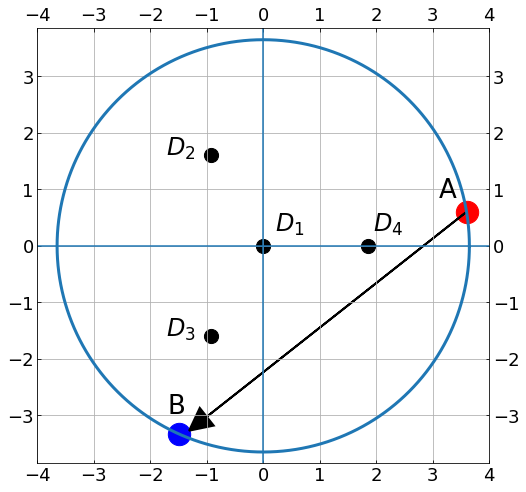

In [3]:
plt.figure(figsize=(10,8))
angs   = linspace(0,6.28,1000)
xs,ys  = R*cos(angs), R*sin(angs)
#Plot cylinder transverse cross-section
plt.plot(xs,ys,lw=3)
plt.scatter(A[0],A[1],c='r',s=500) ;  plt.scatter(B[0],B[1],c='b',s=500);
plt.scatter(c1[0],c1[1],c='k',s=200); plt.scatter(c2[0],c2[1],c='k',s=200);
plt.scatter(c3[0],c3[1],c='k',s=200); plt.scatter(c4[0],c4[1],c='k',s=200);
plt.axhline(0)
plt.axvline(0)
plt.axis('scaled')
plt.arrow(A[0], A[1], B[0]-3.1, B[1]-0.3, head_width=0.4, head_length=0.4, fc='k', ec='k', lw=2)
plt.text(A[0]-0.5,A[1]+0.25, "A", fontsize=26)
plt.text(B[0]-0.2,B[1]+0.35, "B", fontsize=26)
plt.text(c1[0]+0.2,c1[1]+0.25, "$D_1$", fontsize=24)
plt.text(c2[0]-0.8,c2[1], "$D_2$", fontsize=24)
plt.text(c3[0]-0.8,c3[1], "$D_3$", fontsize=24)
plt.text(c4[0]+0.1,c4[1]+0.25, "$D_4$", fontsize=24)
plt.xlim(-R-0.2,R+0.2)
plt.ylim(-R-0.2,R+0.2)
plt.xticks(arange(-4.0,4.1,1))
plt.tick_params(axis='both', direction='in', labelsize=18)
plt.tick_params(labeltop=True, labelright=True, labelbottom=True, labelleft=True, bottom=True, top=True, left=True, right=True)
plt.grid(True)
plt.savefig('cross_ssection.png',dpi=500)

## Necessary functions 

In [ ]:
### Calculate brightness at the muon entry point
def entry_brightness(L,c,v,alpha,den):
    tt     = L/c
    aterm  = (c*c*tt*v-L*v*v*cos(alpha))
    bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
    xp     = (aterm + sqrt(bterm)) / den
    cterm  = (c*c*v)
    dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
    vp     = (cterm + (dterm/sqrt(bterm))) / den
    kp     = sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) )
    betap  = alpha
    vtp    = vp*sin(betap)
    omegap = vtp / kp
    bp     = abs(omegap/(kp**2))
    return bp

#Different plotting scenarios
def plus_t_vs_x (a, b, color, label):
    plt.plot(a, b, c=color, ls='-' , lw=2.5, label=label)
def minus_t_vs_x(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_x (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'image distance $x_{pm}$ from entry point (in meters)', fontsize=18)
    plt.axhline(xc, c='k', ls=':')
    
def plus_t_vs_b (a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_b(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_b (a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    plt.ylim(1e-2,1e+4)
    
def plus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_t_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_t_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axhline(phic, c='k', ls=':')
    plt.xlabel(r'time since muon entry (in ns)',fontsize=18)
    plt.ylabel(r'angular locations $\phi_{pm}\;(in\;degrees)$',fontsize=18)
    
def plus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='-', lw=2.5, label=label)
def minus_b_vs_ang(a, b, color, label):
    plt.plot(a, b, c=color, ls='--', lw=2.5, label=label)
def both_b_vs_ang(a1, b1, a2, b2, color, label):
    plt.plot(a1, b1, c=color, ls='-' , lw=2.5, label=label)
    plt.plot(a2, b2, c=color, ls='--', lw=2.5)
    plt.axvline(phic, c='k', ls=':')
    plt.axhline(1,c='k',ls=':')
    plt.xlabel(r'angular locations $\phi_{pm}\;(in\;degrees)$',fontsize=18)
    plt.ylabel(r'relative brightness ($b/b_{entry}$)', fontsize=18) 
    plt.yscale('log')
    plt.ylim(1e-2,1e+4)

## Computations and plotting

In [12]:
plt.figure()

plotme    = 't vs b' #---------Plot type selection
#plotme    = 't vs x'
#plotme    = 't vs ang'
#plotme    = 'b vs ang'
detector_coordinates = [c1,c2,c3,c4]
colors               = ['k','r','b','g']
detectors            = [1,2,3,4]
labels               = ['Central Detector', "Detector 2",'Detector 3','Detector 4']

for D, color, detector, mylabel in zip(detector_coordinates, colors, detectors, labels):
    
    print("==============================================")
    print("Detector ", detector)   
    AD    = D - A
    BD    = D - B
    L     = LA.norm(AD)
    alpha = arccos((sum(AD*AB))/(L*nAB)) #----------------------Angle between detector and muon track through entry point A
    xc    = L*cos(alpha) - (c*L*sin(alpha))/sqrt(-den) #--------Critical height
    print('XC: ',round(xc,3), " m")
    T,XP,XM,BP,BM,PHIP,PHIM = [],[],[],[],[],[],[]
    
    for iii,t in enumerate(times):

        x      = v*t #------------Distance traveled by muon in time t
        ratio  = x/nAB
        X      = array([ (1-ratio)*A[0] + ratio*B[0] , (1-ratio)*A[1] + ratio*B[1] , h   ]) 
        AX,DX  = X - A, X-D
        k      = sqrt(L*L+x*x-2*L*x*cos(alpha)) #--------Distance between detector and muon at time t
        t1,t2  = t, k/c
        tt     = t1 + t2 #-----------------Total time taken by detector to see the muon
        
        aterm  = (c*c*tt*v-L*v*v*cos(alpha))
        bterm  = (v*v*( -L*L*v*v + c*c*L*L + c*c*tt*tt*v*v - 2*c*c*L*tt*v*cos(alpha) + L*L*v*v*cos(alpha)**2))
        xp     = (aterm + sqrt(bterm)) / den #------Distance of first cherenkov image from entry point A
        xm     = (aterm - sqrt(bterm)) / den #------Distance of second cherenkov image from entry point A
        
        cterm  = (c*c*v)
        dterm  = (c*c*v*v*v*(tt*v-L*cos(alpha)))
        vp     = (cterm + (dterm/sqrt(bterm))) / den #----Velocity of first cherenkov image
        vm     = (cterm - (dterm/sqrt(bterm))) / den #----Velocity of second cherenkov image
        
        kp     = sqrt( L*L + xp*xp - 2*L*xp*cos(alpha) ) #---Distance of first cherenkov image from detector
        km     = sqrt( L*L + xm*xm - 2*L*xm*cos(alpha) ) #---Distance of second cherenkov image from detector
        
        betap  = pi - arccos( (xp*xp + kp*kp - L*L) / (2*xp*kp) )  
        betam  = pi - arccos( (xm*xm + km*km - L*L) / (2*xm*km) )  
        
        vtp    = vp*sin(betap)   #------Transverse velocity of first cherenkov image
        vtm    = vm *sin(betam ) #------Transverse velocity of second cherenkov image
        omegap = vtp / kp
        omegam = vtm  / km
        bp,bm  = abs(omegap/(kp**2)), abs(omegam/(km **2)) #------Brightness of first and second cherenkov images
        
        phip   = arccos( (L*L + kp*kp - xp*xp ) / (2*L*kp) ) #----Angular location of first cherenkov image as seen by detector
        phim   = arccos( (L*L + km*km - xm*xm ) / (2*L*km) ) #----Angular location of second cherenkov imaage as seen by detector
        
        XP.append(xp); XM.append(xm); BP.append(bp); BM.append(bm); PHIP.append(rad2deg(phip)); PHIM.append(rad2deg(phim)); T.append(tt)

    XP, XM, BP, BM, T, PHIP, PHIM = array(XP), array(XM), array(BP), array(BM), array(T), array(PHIP), array(PHIM)
    TT  = T * 1e+9 #------Convert time in nanoseconds
    conp     = [(XP>=0) & (XP<=nAB)] #----------------Consider only the images inside the tank
    conm     = [(XM>=0) & (XM<=nAB)] #-----------------------------do-------------------------
    pluslen  = len (XP[conp])
    minuslen = len (XM[conm])
    kc       = sqrt( L*L + xc*xc - 2*L*xc*cos(alpha) ) #--------------------Distance between detector and the point of first RID
    phic     = rad2deg(arccos( (L*L + kc*kc - xc*xc ) / (2*L*kc) )) #-------Angular location of first RID as seen by the detector
    if detector==1:
        Bnorm = entry_brightness(L,c,v,alpha,den) #----------Use this to normalize brightness wrt the entry point
                                                           # as seen by the central detector 
    if pluslen == 0:
        if minuslen == 0:
            print("Images outside tank. Skipping...")
        else:
            print('One image moving towards exit B.')
            TT,XM,BM,PHIM = TT[conm], XM[conm], BM[conm]/Bnorm, PHIM[conm]
            if   plotme=='t vs b'  :minus_t_vs_b  (a=TT, b=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :minus_t_vs_x  (a=TT, b=XM    , color=color, label=mylabel)
            elif plotme=='t vs ang':minus_t_vs_ang(a=TT, b=PHIM, color=color, label=mylabel)
            elif plotme=='b vs ang':minus_b_vs_ang(a=PHIM, b=BM, color=color, label=mylabel)
    
    elif pluslen != 0:
        if minuslen == 0:
            print('One image moving towards entry A.')
            TT,XP,BP,PHIP = TT[conp], XP[conp], BP[conp]/Bnorm, PHIP[conp]
            if   plotme=='t vs b'  :plus_t_vs_b  (a=TT, b=BP    , color=color, label=mylabel)
            elif plotme=='t vs x'  :plus_t_vs_x  (a=TT, b=XP    , color=color, label=mylabel)
            elif plotme=='t vs ang':plus_t_vs_ang(a=TT, b=PHIP, color=color, label=mylabel)
            elif plotme=='b vs ang':plus_b_vs_ang(a=PHIP, b=BP, color=color, label=mylabel)
        else:
            print('Both images moving')
            TTm, XM, BM, PHIM = TT[conm], XM[conm], BM[conm]/Bnorm, PHIM[conm]
            TTp, XP, BP, PHIP = TT[conp], XP[conp], BP[conp]/Bnorm, PHIP[conp]
            if   plotme=='t vs b'  :both_t_vs_b  (a1=TTp, b1=BP    , a2=TTm, b2=BM    , color=color, label=mylabel)
            elif plotme=='t vs x'  :both_t_vs_x  (a1=TTp, b1=XP    , a2=TTm, b2=XM    , color=color, label=mylabel)
            elif plotme=='t vs ang':both_t_vs_ang(a1=TTp, b1=PHIP, a2=TTm, b2=PHIM, color=color, label=mylabel)
            elif plotme=='b vs ang':both_b_vs_ang(a1=PHIP, b1=BP, a2=PHIM, b2=BM,   color=color, label=mylabel)

plt.tick_params(axis='both', direction='in', labelsize=18)
plt.legend(prop={'size': 14}) 
plt.show()

Using matplotlib backend: Qt5Agg
Detector  1
XC:  1.176  m
Both images moving
Detector  2
XC:  -1.119  m
One image moving towards exit B.
Detector  3
XC:  3.639  m
Both images moving
Detector  4
XC:  0.871  m
Both images moving
